In [1]:
#AutoEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

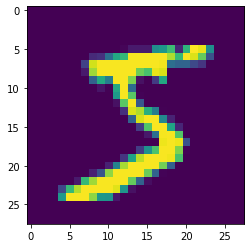

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train = X_train/255
X_test = X_test/255

In [7]:
#Add noise to the images
from tensorflow.keras.layers import GaussianNoise

In [12]:
#Ignore thw Warnings
noise = GaussianNoise(0.2)
noisy = noise(X_train[0],training = True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



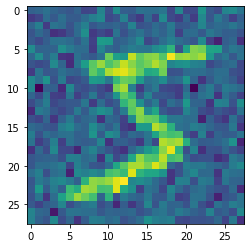

In [13]:
plt.imshow(noisy)

In [19]:
#Creating Autoencoder to remove noise and Reconstruct the image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape,Flatten,Dense


In [32]:
#Creating Encoder

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

#Adding noise
encoder.add(GaussianNoise(0.5))

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [33]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [34]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [35]:
autoencoder.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1886 - accuracy: 0.1576
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1471 - accuracy: 0.2095
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1383 - accuracy: 0.2206
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1333 - accuracy: 0.2275
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1304 - accuracy: 0.2325
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1284 - accuracy: 0.2356
Epoch 7/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1267 - accuracy: 0.2382
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1251 - accuracy: 0.2415
Epoch 9/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1238 - accuracy: 0.2433
Epoch 10/10
1875/1875 [==============================] - 25s 14m

In [36]:
Noisy_images = noise(X_test[0:10],training = True)
denoised = autoencoder(Noisy_images[0:10])

Original image


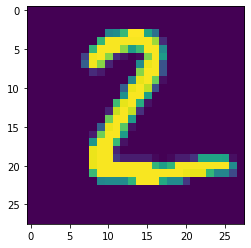

Noisy image


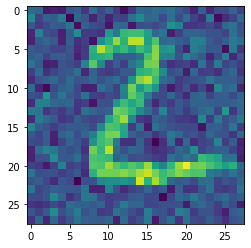

Reconstructed image


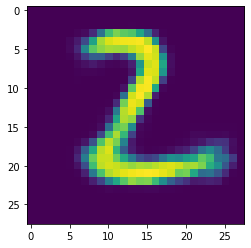

In [37]:
n = 1

print("Original image")
plt.imshow(X_test[n])
plt.show()

print("Noisy image")
plt.imshow(Noisy_images[n])
plt.show()

print("Reconstructed image")
plt.imshow(denoised[n])
plt.show()